In [1]:
from google.colab import files
import zipfile
import os

# Upload zip file
uploaded = files.upload()

# Extract zip file
for fn in uploaded.keys():
    if fn.endswith(".zip"):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall("crop_dataset")
            print("Files extracted to 'crop_dataset'")


Saving archive (2).zip to archive (2).zip
Files extracted to 'crop_dataset'


In [2]:
import pandas as pd

# Find CSV file in extracted folder
data_path = "crop_dataset"
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
csv_path = os.path.join(data_path, csv_files[0])

# Load the dataset
df = pd.read_csv(csv_path)
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nNull values:\n", df.isnull().sum())
df.describe()


Dataset shape: (2200, 8)

Columns:
 Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Null values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


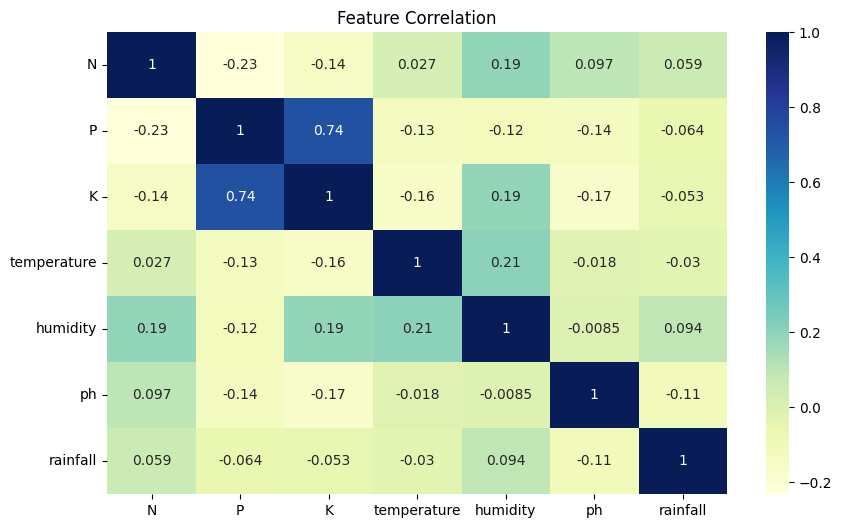

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (like 'label')
numeric_df = df.drop(columns=['label'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation")
plt.show()




In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

In [10]:
# Sample input: [N, P, K, temperature, humidity, ph, rainfall]
sample = [[90, 42, 43, 20.5, 82, 6.5, 200]]
predicted_crop = model.predict(sample)
print("Recommended Crop:", predicted_crop[0])


Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
import joblib

joblib.dump(model, "crop_recommendation_model.pkl")
print("Model saved as crop_recommendation_model.pkl")


Model saved as crop_recommendation_model.pkl
